**Project Objective**

Predicting sales based on the money spent on advetising in TV, Radio and Newspaper

**Importing Libraries**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Importing Data**

In [3]:
data = pd.read_csv('/content/advertising.csv')

**Exploring Data**

In [5]:
data.shape

(200, 4)

In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

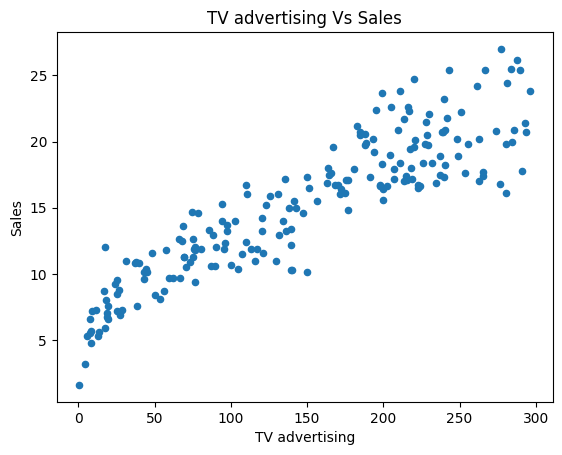

In [21]:
data.plot.scatter('TV', 'Sales')
plt.title('TV advertising Vs Sales')
plt.xlabel('TV advertising')
plt.ylabel('Sales')
plt.show()

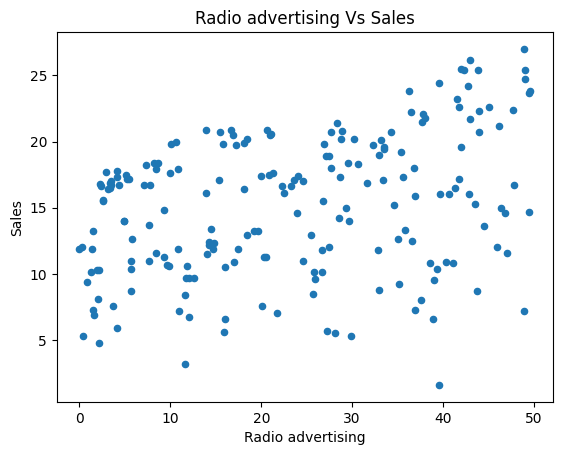

In [22]:
data.plot.scatter('Radio', 'Sales')
plt.title('Radio advertising Vs Sales')
plt.xlabel('Radio advertising')
plt.ylabel('Sales')
plt.show()

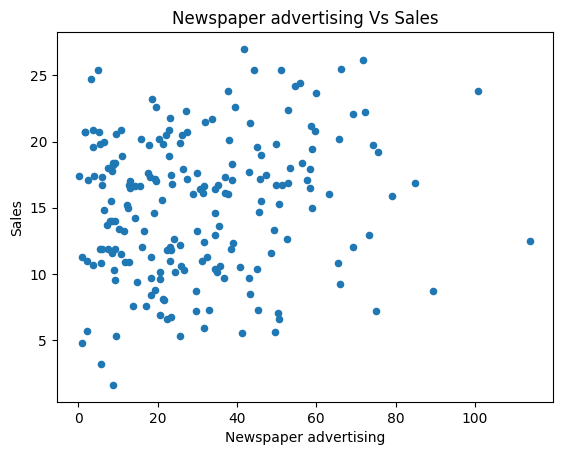

In [23]:
data.plot.scatter('Newspaper', 'Sales')
plt.title('Newspaper advertising Vs Sales')
plt.xlabel('Newspaper advertising')
plt.ylabel('Sales')
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

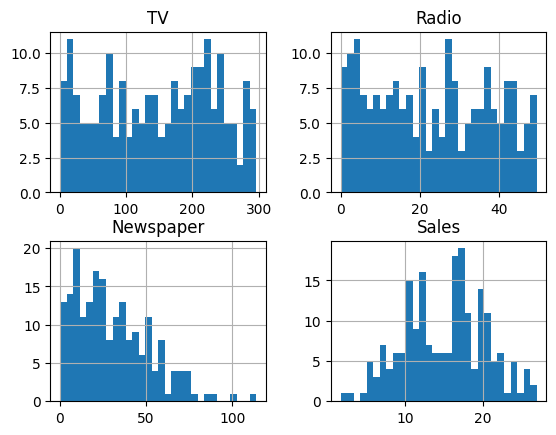

In [78]:
data.hist(bins=30)

<Axes: >

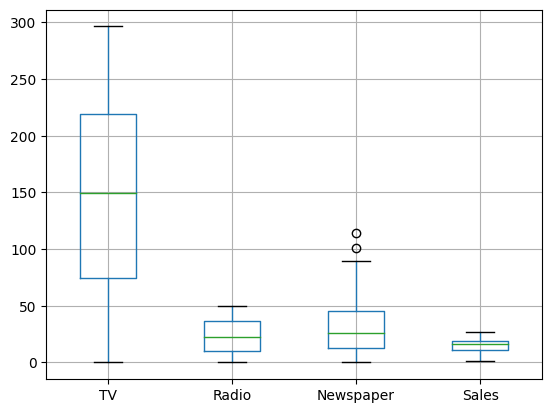

In [79]:
data.boxplot()

**Identifying Target Varaible and Features**

In [80]:
X = data.drop('Sales', axis =1)
y = data['Sales']

**Dividing Train & Test Set**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Implementing Model**

In [82]:
lr = LinearRegression()
lr.fit(X_train,y_train )

LinearRegression()

In [83]:
print('slope', lr.coef_)
print('intercept', lr.intercept_)

slope [0.05461383 0.09975946 0.00430495]
intercept 4.741842244124568


**Prediction**

In [84]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

**Evaluation**

In [85]:
meanSqErr_train = mean_squared_error(y_pred_train, y_train)
RSq_train = r2_score(y_pred_train, y_train)
rootmeansqErr_train = sqrt(meanSqErr_train)
meanAbErr_train = mean_absolute_error(y_pred_train, y_train)
print('R squared:', RSq_train)
print('Mean Absolute Error:', meanAbErr_train)
print('Mean Square Error:', meanSqErr_train)
print('Root Mean Square Error:', rootmeansqErr_train)    

R squared: 0.8836494652774313
Mean Absolute Error: 1.286798699894718
Mean Square Error: 2.8352482144126827
Root Mean Square Error: 1.6838195314262994


In [86]:
meanSqErr_test = mean_squared_error(y_pred_test, y_test)
RSq_test = r2_score(y_pred_test, y_test)
rootmeansqErr_test = sqrt(meanSqErr_test)
meanAbErr_test = mean_absolute_error(y_pred_test, y_test)
print('R squared:', RSq_test)
print('Mean Absolute Error:', meanAbErr_test)
print('Mean Square Error:', meanSqErr_test)
print('Root Mean Square Error:', rootmeansqErr_test)
     

R squared: 0.90514835876105
Mean Absolute Error: 1.1199940713361773
Mean Square Error: 2.404067444711889
Root Mean Square Error: 1.5505055448826648


**Visualizing Expected Vs. Predicted Values**

In [95]:
df = pd.DataFrame()
df['Actual'] = pd.DataFrame(y_pred_test)
y_test1 = y_test.reset_index()
df['Predicted'] = pd.DataFrame(y_test1['Sales'])

In [96]:
df.head()

,Actual,Predicted
0,17.040412,16.9
1,20.399644,22.4
2,23.747401,21.4
3,9.256532,7.3
4,21.675259,24.7


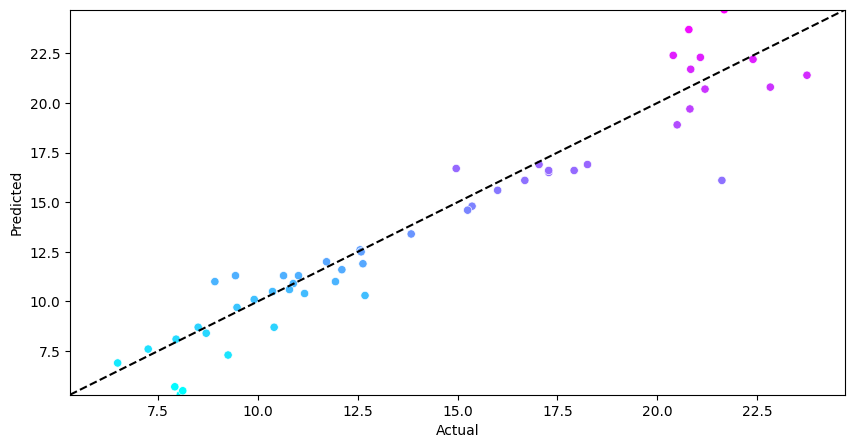

In [105]:
import seaborn as sns
figure = plt.figure(figsize=(10, 5))

axes = sns.scatterplot(data=df, x='Actual', y='Predicted', hue='Predicted', palette='cool', 
                       legend=False)
start = min(df['Actual'].min(), df['Predicted'].min())
end   = max(df['Actual'].max(), df['Predicted'].max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')